# CPI

A CPI egy indexszám, amely az országokat az érzékelt állami szektori korrupció alapján rangsorolja, szakértőkre és üzletemberekre alapozva.

A CPI 180 országot rangsorol, és 0-tól 100-ig tartó skálát használ. A skálán egy nagyobb érték a korrupció-mentességet
egy alacsonyabb pedig átható, szétterjedt és mély korrupciós behatást.

A vizsgált országok közül, mintegy kétharmaduk 50 pont alatt szerez a skálán, tehát az országok kétharmada erőteljesen
korruptnak tekinthető.

A 180 ország átlaga 43 pont.

Érdekesség, hogy a skálán egyetlen ország sem szerzett tökéletes pontszámot, 2019-ben a legközelebb Új-Zéland állt 87 ponttal.

In [10]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import requests
import seaborn as sb

In [15]:
df = pd.read_excel('../data/CPI2019.xlsx', sheet_name='CPI Timeseries 2012 - 2019', skiprows=[0, 1])

In [16]:
df

,Country,ISO3,Region,CPI Score 2019,Rank 2019,Sources 2019,Standard error 2019,CPI Score 2018,Rank 2018,Sources 2018,...,Standard error 2015,CPI Score 2014,Sources 2014,Standard error 2014,CPI Score 2013,Sources 2013,Standard error 2013,CPI Score 2012,Sources 2012,Standard error 2012
0,New Zealand,NZL,AP,87,1,8,2.286490,87,2,8,...,2.32,91.0,7.0,2.28,91.0,7.0,2.3,90.0,7.0,2.2
1,Denmark,DNK,WE/EU,87,1,8,2.542474,88,1,8,...,2.16,92.0,7.0,2.04,91.0,7.0,2.2,90.0,7.0,2.0
2,Finland,FIN,WE/EU,86,3,8,2.924511,85,3,8,...,1.77,89.0,7.0,2.05,89.0,7.0,1.7,90.0,7.0,3.0
3,Switzerland,CHE,WE/EU,85,4,7,1.580087,85,3,7,...,2.55,86.0,6.0,2.61,85.0,6.0,2.5,86.0,6.0,2.6
4,Singapore,SGP,AP,85,4,9,2.048400,85,3,9,...,2.02,84.0,8.0,1.75,86.0,9.0,2.3,87.0,9.0,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Afghanistan,AFG,AP,16,173,5,2.554536,16,172,5,...,3.49,12.0,4.0,1.29,8.0,3.0,3.3,8.0,3.0,3.3
176,Yemen,YEM,MENA,15,177,7,1.885994,14,176,7,...,2.66,19.0,6.0,2.37,18.0,6.0,2.6,23.0,6.0,2.2
177,Syria,SYR,MENA,13,178,5,1.921515,13,178,5,...,5.66,20.0,4.0,5.31,17.0,4.0,3.8,26.0,5.0,2.7
178,South Sudan,SSD,SSA,12,179,5,1.263942,13,178,5,...,1.45,15.0,3.0,2.35,14.0,3.0,1.6,NaN,NaN,NaN


In [17]:
df.describe()

,CPI Score 2019,Rank 2019,Sources 2019,Standard error 2019,CPI Score 2018,Rank 2018,Sources 2018,Standard error 2018,CPI Score 2017,Rank 2017,...,Standard error 2015,CPI Score 2014,Sources 2014,Standard error 2014,CPI Score 2013,Sources 2013,Standard error 2013,CPI Score 2012,Sources 2012,Standard error 2012
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,...,168.00000,174.000000,174.000000,174.000000,176.000000,176.000000,176.000000,175.000000,175.000000,175.000000
mean,43.166667,88.966667,7.061111,3.141092,43.116667,89.127778,6.944444,2.985778,43.072222,89.116667,...,3.30381,43.155172,6.160920,3.308736,42.545455,6.386364,3.272159,43.154286,6.325714,3.187429
std,18.960264,51.656353,1.791238,1.573644,19.142008,51.748320,1.890057,1.530886,19.051542,51.765185,...,1.54643,19.840813,1.702589,1.513022,19.925810,1.884868,1.598559,19.673606,1.866884,1.524385
min,9.000000,1.000000,3.000000,0.814684,10.000000,1.000000,3.000000,0.770000,9.000000,1.000000,...,1.32000,8.000000,3.000000,0.840000,8.000000,3.000000,0.800000,8.000000,3.000000,0.800000
25%,29.000000,44.000000,6.000000,2.151876,29.000000,45.000000,6.000000,2.045000,29.000000,45.000000,...,2.31250,29.000000,5.000000,2.340000,28.000000,5.000000,2.300000,28.500000,5.000000,2.200000
50%,39.500000,88.000000,7.000000,2.653288,38.000000,89.000000,7.000000,2.620000,38.500000,88.000000,...,2.87000,38.000000,6.000000,2.970000,38.000000,7.000000,2.900000,37.000000,7.000000,2.800000
75%,56.000000,130.000000,8.000000,3.614812,57.000000,132.000000,8.000000,3.407500,56.250000,135.000000,...,3.85500,55.000000,7.750000,3.902500,55.250000,8.000000,3.800000,55.500000,8.000000,3.800000
max,87.000000,180.000000,10.000000,9.778998,88.000000,180.000000,10.000000,9.460000,89.000000,180.000000,...,9.07000,92.000000,9.000000,9.100000,91.000000,10.000000,11.000000,90.000000,10.000000,9.200000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              180 non-null    object 
 1   ISO3                 180 non-null    object 
 2   Region               180 non-null    object 
 3   CPI Score 2019       180 non-null    int64  
 4   Rank 2019            180 non-null    int64  
 5   Sources 2019         180 non-null    int64  
 6   Standard error 2019  180 non-null    float64
 7   CPI Score 2018       180 non-null    int64  
 8   Rank 2018            180 non-null    int64  
 9   Sources 2018         180 non-null    int64  
 10  Standard error 2018  180 non-null    float64
 11  CPI Score 2017       180 non-null    int64  
 12  Rank 2017            180 non-null    int64  
 13  Sources 2017         180 non-null    int64  
 14  Standard error 2017  180 non-null    float64
 15  CPI Score 2016       176 non-null    flo

In [49]:
df.shape # 180 sorunk és 30 oszlopunk van

(180, 30)

In [40]:
df_indexed = df.set_index('Country')

In [33]:
nz = df_indexed.loc['New Zealand']

cols = []

for y in range(2012, 2020):
    cols.append('CPI Score {}'.format(y))

In [37]:
# érdekelt cellák: 2019-2012 CPI Score, Country, ISO3, Region
cols = ['Country', 'ISO3', 'Region'] + cols

In [39]:
df[cols].head()

# Felső 5 ország a CPI ranglétrán,
# nyugat-európai országok legtöbbje, két érdekesség, az Új-Zéland és Szingapúr, Oceániát és Ázsiát képviselve

,Country,ISO3,Region,CPI Score 2012,CPI Score 2013,CPI Score 2014,CPI Score 2015,CPI Score 2016,CPI Score 2017,CPI Score 2018,CPI Score 2019
0,New Zealand,NZL,AP,90.0,91.0,91.0,91.0,90.0,89,87,87
1,Denmark,DNK,WE/EU,90.0,91.0,92.0,91.0,90.0,88,88,87
2,Finland,FIN,WE/EU,90.0,89.0,89.0,90.0,89.0,85,85,86
3,Switzerland,CHE,WE/EU,86.0,85.0,86.0,86.0,86.0,85,85,85
4,Singapore,SGP,AP,87.0,86.0,84.0,85.0,84.0,84,85,85


In [36]:
df[cols].tail()

# Utolsó 5 ország a CPI ranglétrán,
# általában arab-afrikai országok
# bőven az alsó határt súrolva

,Country,ISO3,Region,CPI Score 2019,Rank 2019,Sources 2019,Standard error 2019,CPI Score 2018,Rank 2018,Sources 2018,...,Standard error 2015,CPI Score 2014,Sources 2014,Standard error 2014,CPI Score 2013,Sources 2013,Standard error 2013,CPI Score 2012,Sources 2012,Standard error 2012
175,Afghanistan,AFG,AP,16,173,5,2.554536,16,172,5,...,3.49,12.0,4.0,1.29,8.0,3.0,3.3,8.0,3.0,3.3
176,Yemen,YEM,MENA,15,177,7,1.885994,14,176,7,...,2.66,19.0,6.0,2.37,18.0,6.0,2.6,23.0,6.0,2.2
177,Syria,SYR,MENA,13,178,5,1.921515,13,178,5,...,5.66,20.0,4.0,5.31,17.0,4.0,3.8,26.0,5.0,2.7
178,South Sudan,SSD,SSA,12,179,5,1.263942,13,178,5,...,1.45,15.0,3.0,2.35,14.0,3.0,1.6,NaN,NaN,NaN
179,Somalia,SOM,SSA,9,180,5,1.740826,10,180,6,...,2.32,8.0,4.0,2.34,8.0,4.0,1.9,8.0,4.0,2.3


In [41]:
df[cols].describe()

,CPI Score 2012,CPI Score 2013,CPI Score 2014,CPI Score 2015,CPI Score 2016,CPI Score 2017,CPI Score 2018,CPI Score 2019
count,175.000000,176.000000,174.000000,168.000000,176.000000,180.000000,180.000000,180.000000
mean,43.154286,42.545455,43.155172,42.595238,42.948864,43.072222,43.116667,43.166667
std,19.673606,19.925810,19.840813,20.195819,19.436716,19.051542,19.142008,18.960264
min,8.000000,8.000000,8.000000,8.000000,10.000000,9.000000,10.000000,9.000000
25%,28.500000,28.000000,29.000000,28.000000,29.000000,29.000000,29.000000,29.000000
50%,37.000000,38.000000,38.000000,37.000000,38.000000,38.500000,38.000000,39.500000
75%,55.500000,55.250000,55.000000,54.250000,57.000000,56.250000,57.000000,56.000000
max,90.000000,91.000000,92.000000,91.000000,90.000000,89.000000,88.000000,87.000000


statisztikai mutatók az index számunkra érdekelt numerikus értékeiről
2012-ben az átlag pontszám 43.15 volt, szórás 20 körül, és 180 ország helyett, mindössze 175 volt
a min pontszám minden évben nagyon alacsony, 10 alatt, vagy 10 volt
a max pontszám egyik évben sem haladta meg a 95-öt
a medián érték 2012-ben 37, míg 2019-ben 39.5, ami nagyon alacsony

namármost, most képesek vagyunk azt észrevenni, hogy az átlag > medián,
ami azt jelenti, hogy jobb oldalra nyúló farka van az ábránknak, ha normális eloszlású ábrát készítenénk
tehát, jobb oldali asszimetriánk van a CPI esetén
ez az észrevétel minden évre igaz

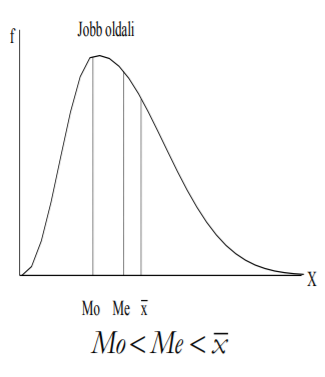

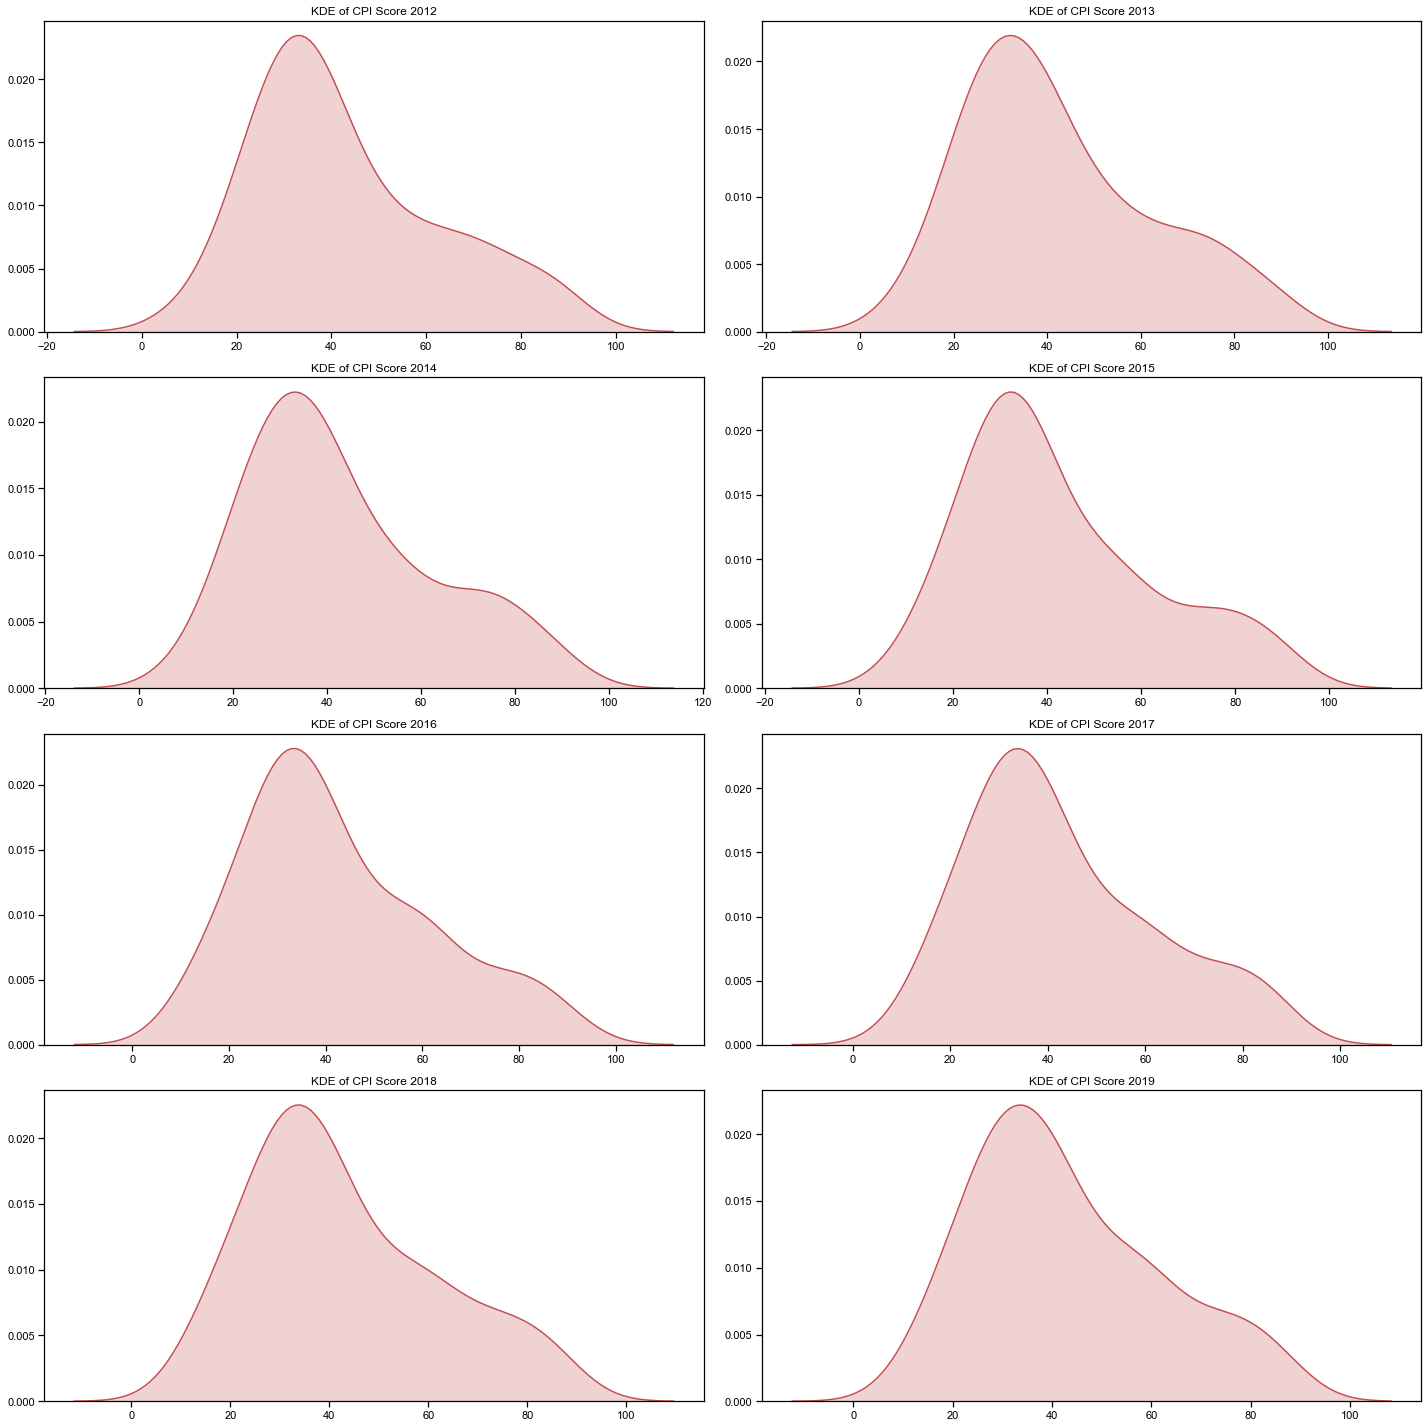

In [106]:
figure, axis = plt.subplots(ncols=2, nrows=4, figsize=(20, 20))

sb.set(style='whitegrid')

year = 2012
    
for r in range(0, 4):
    for c in range(0, 2):
        sb.kdeplot(df['CPI Score {}'.format(year)], shade=True, color='r', ax=axis[r][c], legend=False)
        axis[r][c].set_title('KDE of CPI Score {}'.format(year))
        year += 1
        
plt.tight_layout(h_pad=1)
plt.show()

In [84]:
df[cols].sample(5)

,Country,ISO3,Region,CPI Score 2012,CPI Score 2013,CPI Score 2014,CPI Score 2015,CPI Score 2016,CPI Score 2017,CPI Score 2018,CPI Score 2019
5,Sweden,SWE,WE/EU,88.0,89.0,87.0,89.0,88.0,84,85,85
60,Greece,GRC,WE/EU,36.0,40.0,43.0,46.0,44.0,48,45,48
163,Iraq,IRQ,MENA,18.0,16.0,16.0,16.0,17.0,18,18,20
20,United Arab Emirates,ARE,MENA,68.0,69.0,70.0,70.0,66.0,71,70,71
55,Namibia,NAM,SSA,48.0,48.0,49.0,53.0,52.0,51,53,52


In [47]:
# visszaadja a sorok 10%-át, random kiválasztva
df[cols].sample(frac=0.1)

,Country,ISO3,Region,CPI Score 2012,CPI Score 2013,CPI Score 2014,CPI Score 2015,CPI Score 2016,CPI Score 2017,CPI Score 2018,CPI Score 2019
63,Sao Tome and Principe,STP,SSA,42.0,42.0,42.0,42.0,46.0,46,46,46
171,"Korea, North",PRK,AP,8.0,8.0,8.0,8.0,12.0,17,14,17
93,Timor-Leste,TLS,AP,33.0,30.0,28.0,28.0,35.0,38,35,38
12,United Kingdom,GBR,WE/EU,74.0,76.0,78.0,81.0,81.0,82,80,77
118,Sierra Leone,SLE,SSA,31.0,30.0,31.0,29.0,30.0,30,30,33
174,Sudan,SDN,SSA,13.0,11.0,11.0,12.0,14.0,16,16,16
151,Angola,AGO,SSA,22.0,23.0,19.0,15.0,18.0,19,19,26
47,Dominica,DMA,AME,58.0,58.0,58.0,NaN,59.0,57,57,55
177,Syria,SYR,MENA,26.0,17.0,20.0,18.0,13.0,14,13,13
148,Bangladesh,BGD,AP,26.0,27.0,25.0,25.0,26.0,28,26,26


In [50]:
df.isnull().any() # 2016-tól 2012-ig vannak hiányzó adatok

Country                False
ISO3                   False
Region                 False
CPI Score 2019         False
Rank 2019              False
Sources 2019           False
Standard error 2019    False
CPI Score 2018         False
Rank 2018              False
Sources 2018           False
Standard error 2018    False
CPI Score 2017         False
Rank 2017              False
Sources 2017           False
Standard error 2017    False
CPI Score 2016          True
Sources 2016            True
Standard error 2016     True
CPI Score 2015          True
Sources 2015            True
Standard error 2015     True
CPI Score 2014          True
Sources 2014            True
Standard error 2014     True
CPI Score 2013          True
Sources 2013            True
Standard error 2013     True
CPI Score 2012          True
Sources 2012            True
Standard error 2012     True
dtype: bool

In [52]:
df.isnull().sum() # visszadja a sorok számát, ahol van hiányzó érték

Country                 0
ISO3                    0
Region                  0
CPI Score 2019          0
Rank 2019               0
Sources 2019            0
Standard error 2019     0
CPI Score 2018          0
Rank 2018               0
Sources 2018            0
Standard error 2018     0
CPI Score 2017          0
Rank 2017               0
Sources 2017            0
Standard error 2017     0
CPI Score 2016          4
Sources 2016            4
Standard error 2016     4
CPI Score 2015         12
Sources 2015           12
Standard error 2015    12
CPI Score 2014          6
Sources 2014            6
Standard error 2014     6
CPI Score 2013          4
Sources 2013            4
Standard error 2013     4
CPI Score 2012          5
Sources 2012            5
Standard error 2012     5
dtype: int64

In [65]:
df[cols][df['CPI Score 2015'].isnull()]

# a hiányzó adatok esetén nem készült az országról ilyesfajta felmérés

,Country,ISO3,Region,CPI Score 2012,CPI Score 2013,CPI Score 2014,CPI Score 2015,CPI Score 2016,CPI Score 2017,CPI Score 2018,CPI Score 2019
28,Bahamas,BHS,AME,71.0,71.0,71.0,NaN,66.0,65,65,64
29,Barbados,BRB,AME,76.0,75.0,74.0,NaN,61.0,68,68,62
34,Brunei Darussalam,BRN,AP,55.0,60.0,NaN,NaN,58.0,62,63,60
38,Saint Vincent and the Grenadines,VCT,AME,62.0,62.0,62.0,NaN,60.0,58,58,59
47,Dominica,DMA,AME,58.0,58.0,58.0,NaN,59.0,57,57,55
48,Saint Lucia,LCA,AME,71.0,71.0,71.0,NaN,60.0,55,55,55
51,Grenada,GRD,AME,NaN,NaN,NaN,NaN,56.0,52,52,53
64,Vanuatu,VUT,AP,NaN,NaN,NaN,NaN,NaN,43,46,46
76,Solomon Islands,SLB,AP,NaN,NaN,NaN,NaN,42.0,39,44,42
112,Eswatini,SWZ,SSA,37.0,39.0,43.0,NaN,NaN,39,38,34


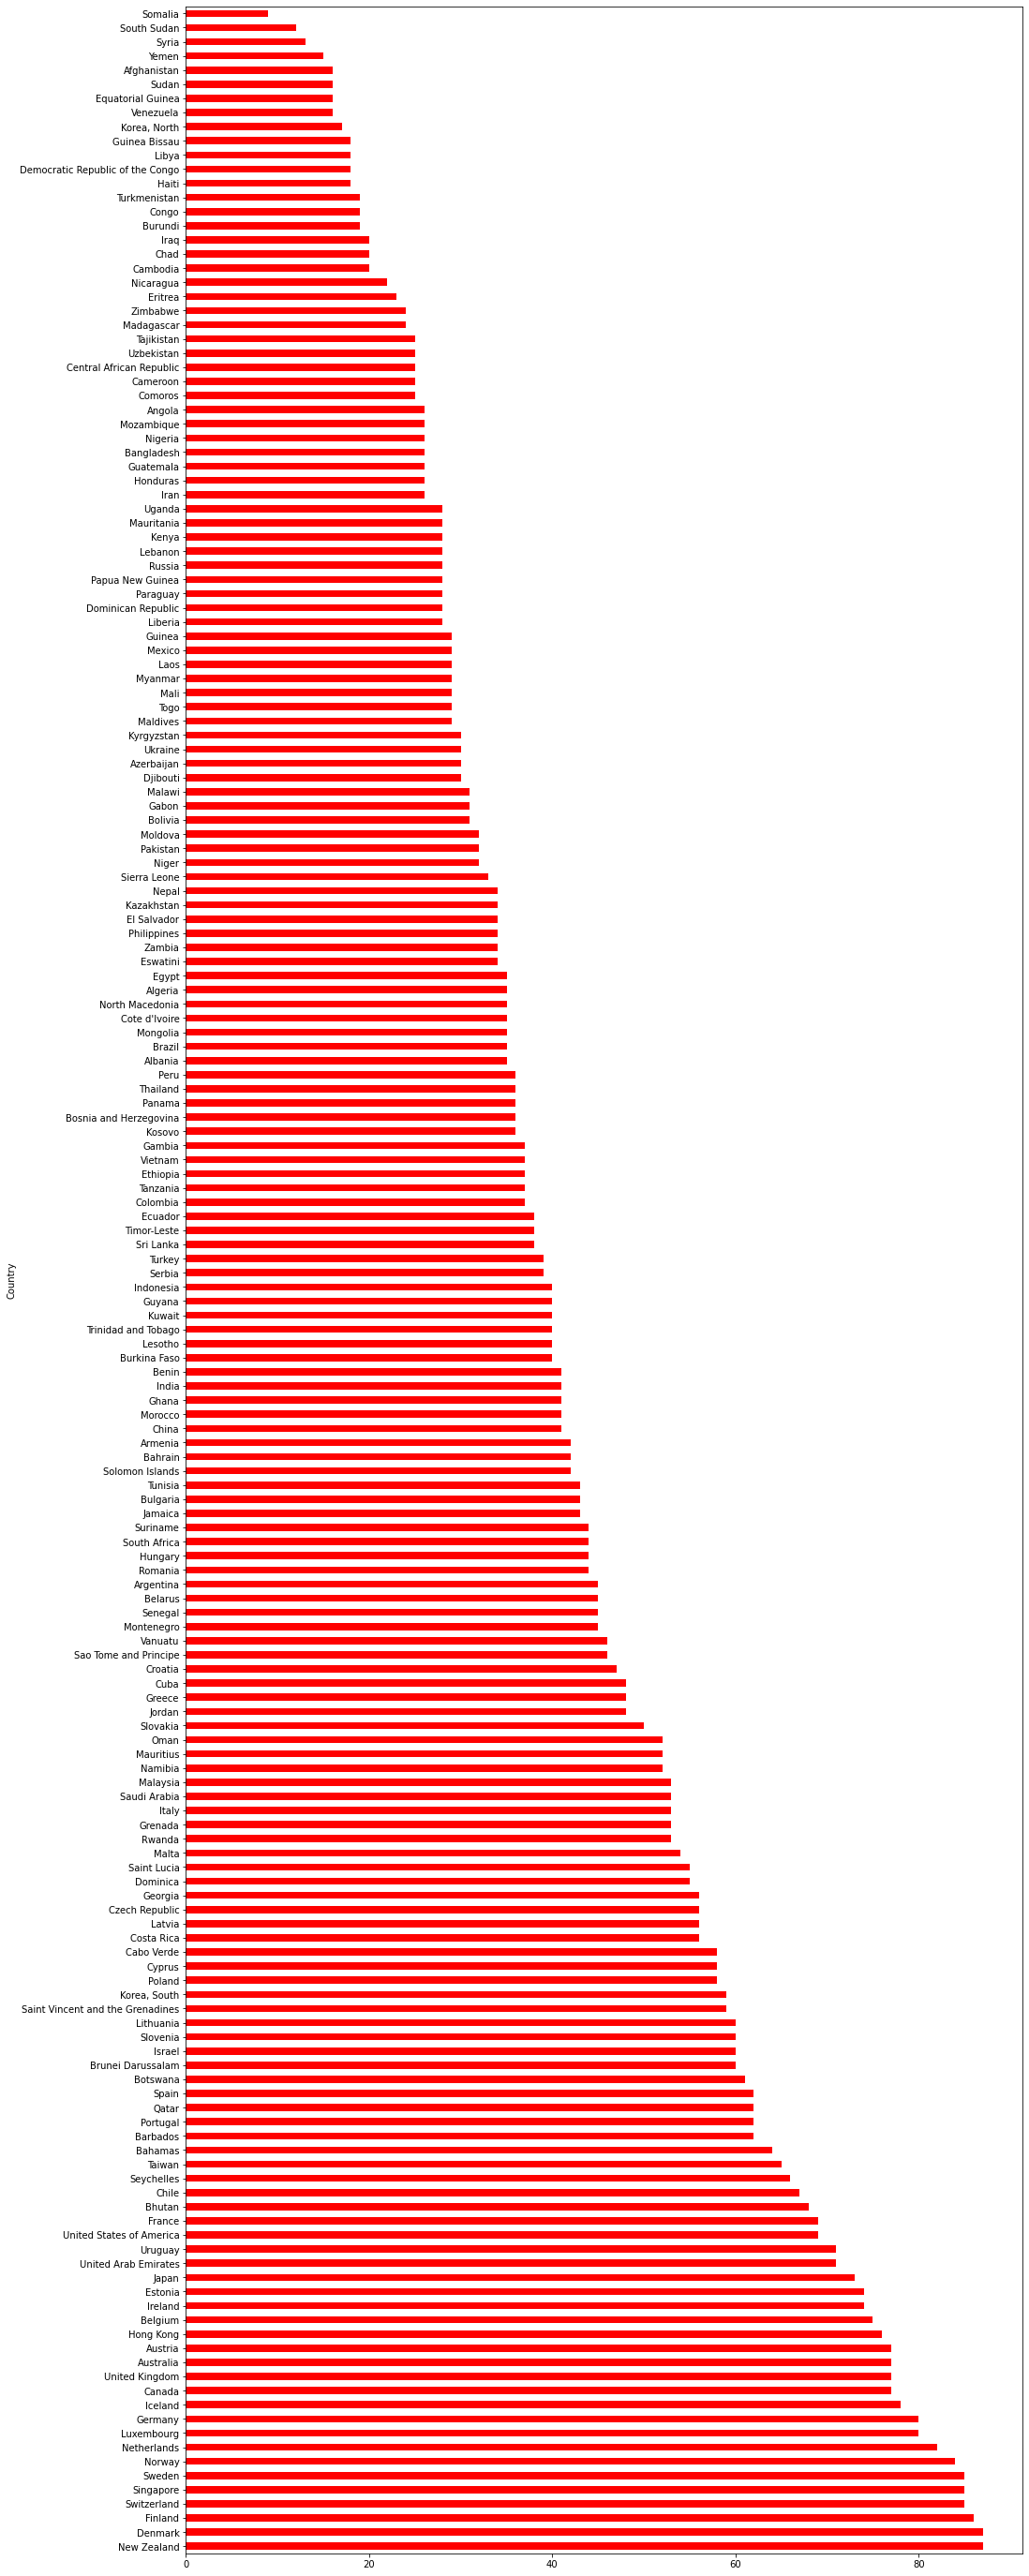

In [97]:
df_indexed[cols[-1]].plot(kind='barh', figsize=(16, 50), color='r')

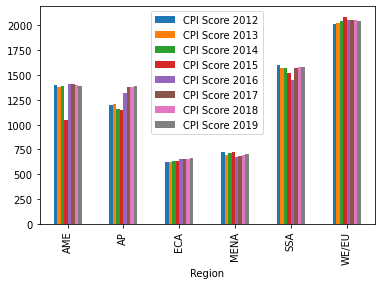

In [104]:
groupedByRegion = df[cols].groupby(['Region'])
groupedByRegion.sum().plot(kind='bar')

In [107]:
df[cols].describe()

,CPI Score 2012,CPI Score 2013,CPI Score 2014,CPI Score 2015,CPI Score 2016,CPI Score 2017,CPI Score 2018,CPI Score 2019
count,175.000000,176.000000,174.000000,168.000000,176.000000,180.000000,180.000000,180.000000
mean,43.154286,42.545455,43.155172,42.595238,42.948864,43.072222,43.116667,43.166667
std,19.673606,19.925810,19.840813,20.195819,19.436716,19.051542,19.142008,18.960264
min,8.000000,8.000000,8.000000,8.000000,10.000000,9.000000,10.000000,9.000000
25%,28.500000,28.000000,29.000000,28.000000,29.000000,29.000000,29.000000,29.000000
50%,37.000000,38.000000,38.000000,37.000000,38.000000,38.500000,38.000000,39.500000
75%,55.500000,55.250000,55.000000,54.250000,57.000000,56.250000,57.000000,56.000000
max,90.000000,91.000000,92.000000,91.000000,90.000000,89.000000,88.000000,87.000000


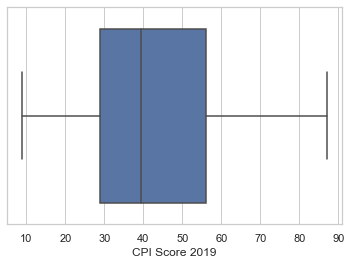

In [108]:
sb.set(style='whitegrid')
sb.boxplot(df[cols[-1]])

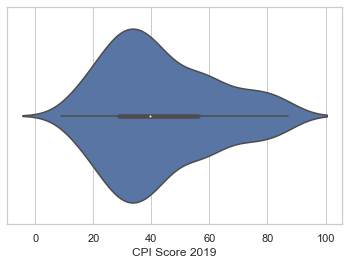

In [112]:
sb.set(style='whitegrid')
sb.violinplot(df[cols[-1]])

In [225]:
hdi = pd.read_csv('../data/HDI.csv')

In [226]:
hdi.drop(206, inplace=True)

In [227]:
del hdi['Unnamed: 31']

In [131]:
hdi

,HDI Rank (2018),Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,170,Afghanistan,0.298,0.304,0.312,0.308,0.303,0.327,0.331,0.335,...,0.447,0.464,0.465,0.479,0.485,0.488,0.490,0.491,0.493,0.496
1,69,Albania,0.644,0.625,0.608,0.611,0.617,0.629,0.639,0.639,...,0.729,0.740,0.759,0.771,0.781,0.787,0.788,0.788,0.789,0.791
2,82,Algeria,0.578,0.582,0.589,0.593,0.597,0.602,0.610,0.619,...,0.720,0.730,0.738,0.737,0.746,0.749,0.751,0.755,0.758,0.759
3,36,Andorra,..,..,..,..,..,..,..,..,...,0.830,0.828,0.827,0.849,0.846,0.853,0.850,0.854,0.852,0.857
4,149,Angola,..,..,..,..,..,..,..,..,...,0.508,0.510,0.525,0.537,0.547,0.557,0.565,0.570,0.576,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,,Sub-Saharan Africa,0.402,0.404,0.404,0.406,0.407,0.411,0.415,0.418,...,0.494,0.498,0.505,0.512,0.521,0.527,0.532,0.535,0.539,0.541
202,,Least Developed Countries,0.350,0.353,0.354,0.358,0.358,0.366,0.374,0.381,...,0.477,0.485,0.493,0.499,0.504,0.510,0.516,0.520,0.525,0.528
203,,Small Island Developing States,0.595,0.598,0.603,0.608,0.612,0.618,0.624,0.629,...,0.694,0.702,0.706,0.704,0.708,0.712,0.717,0.719,0.722,0.723
204,,Organization for Economic Co-operation and Dev...,0.785,0.790,0.788,0.800,0.807,0.812,0.817,0.817,...,0.868,0.873,0.877,0.879,0.883,0.886,0.889,0.892,0.894,0.895


In [139]:
hdi[['Country', '2012', '2013', '2014', '2015', '2016', '2017', '2018']]

,Country,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,0.479,0.485,0.488,0.490,0.491,0.493,0.496
1,Albania,0.771,0.781,0.787,0.788,0.788,0.789,0.791
2,Algeria,0.737,0.746,0.749,0.751,0.755,0.758,0.759
3,Andorra,0.849,0.846,0.853,0.850,0.854,0.852,0.857
4,Angola,0.537,0.547,0.557,0.565,0.570,0.576,0.574
...,...,...,...,...,...,...,...,...
201,Sub-Saharan Africa,0.512,0.521,0.527,0.532,0.535,0.539,0.541
202,Least Developed Countries,0.499,0.504,0.510,0.516,0.520,0.525,0.528
203,Small Island Developing States,0.704,0.708,0.712,0.717,0.719,0.722,0.723
204,Organization for Economic Co-operation and Dev...,0.879,0.883,0.886,0.889,0.892,0.894,0.895


In [140]:
df_final = df[cols].merge(hdi[['Country', '2012', '2013', '2014', '2015', '2016', '2017', '2018']], on='Country')

In [141]:
df_final

,Country,ISO3,Region,CPI Score 2012,CPI Score 2013,CPI Score 2014,CPI Score 2015,CPI Score 2016,CPI Score 2017,CPI Score 2018,CPI Score 2019,2012,2013,2014,2015,2016,2017,2018
0,New Zealand,NZL,AP,90.0,91.0,91.0,91.0,90.0,89,87,87,0.905,0.907,0.910,0.914,0.917,0.920,0.921
1,Denmark,DNK,WE/EU,90.0,91.0,92.0,91.0,90.0,88,88,87,0.924,0.926,0.928,0.926,0.928,0.929,0.930
2,Finland,FIN,WE/EU,90.0,89.0,89.0,90.0,89.0,85,85,86,0.908,0.916,0.918,0.919,0.922,0.924,0.925
3,Switzerland,CHE,WE/EU,86.0,85.0,86.0,86.0,86.0,85,85,85,0.935,0.938,0.939,0.943,0.943,0.943,0.946
4,Singapore,SGP,AP,87.0,86.0,84.0,85.0,84.0,84,85,85,0.920,0.923,0.928,0.929,0.933,0.934,0.935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Equatorial Guinea,GNQ,SSA,20.0,19.0,NaN,NaN,NaN,17,16,16,0.587,0.588,0.590,0.593,0.592,0.590,0.588
155,Sudan,SDN,SSA,13.0,11.0,11.0,12.0,14.0,16,16,16,0.485,0.477,0.496,0.501,0.505,0.507,0.508
156,Afghanistan,AFG,AP,8.0,8.0,12.0,11.0,15.0,15,16,16,0.479,0.485,0.488,0.490,0.491,0.493,0.496
157,Yemen,YEM,MENA,23.0,18.0,19.0,18.0,14.0,16,14,15,0.501,0.506,0.504,0.493,0.477,0.463,0.463


In [146]:
df_final = df_final.rename(columns={'2012': 'HDI 2012', '2013': 'HDI 2013', '2014': 'HDI 2014', '2015': 'HDI 2015', '2016': 'HDI 2016', '2017': 'HDI 2017', '2018': 'HDI 2018'})

In [147]:
df_final

,Country,ISO3,Region,CPI Score 2012,CPI Score 2013,CPI Score 2014,CPI Score 2015,CPI Score 2016,CPI Score 2017,CPI Score 2018,CPI Score 2019,HDI 2012,HDI 2013,HDI 2014,HDI 2015,HDI 2016,HDI 2017,HDI 2018
0,New Zealand,NZL,AP,90.0,91.0,91.0,91.0,90.0,89,87,87,0.905,0.907,0.910,0.914,0.917,0.920,0.921
1,Denmark,DNK,WE/EU,90.0,91.0,92.0,91.0,90.0,88,88,87,0.924,0.926,0.928,0.926,0.928,0.929,0.930
2,Finland,FIN,WE/EU,90.0,89.0,89.0,90.0,89.0,85,85,86,0.908,0.916,0.918,0.919,0.922,0.924,0.925
3,Switzerland,CHE,WE/EU,86.0,85.0,86.0,86.0,86.0,85,85,85,0.935,0.938,0.939,0.943,0.943,0.943,0.946
4,Singapore,SGP,AP,87.0,86.0,84.0,85.0,84.0,84,85,85,0.920,0.923,0.928,0.929,0.933,0.934,0.935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Equatorial Guinea,GNQ,SSA,20.0,19.0,NaN,NaN,NaN,17,16,16,0.587,0.588,0.590,0.593,0.592,0.590,0.588
155,Sudan,SDN,SSA,13.0,11.0,11.0,12.0,14.0,16,16,16,0.485,0.477,0.496,0.501,0.505,0.507,0.508
156,Afghanistan,AFG,AP,8.0,8.0,12.0,11.0,15.0,15,16,16,0.479,0.485,0.488,0.490,0.491,0.493,0.496
157,Yemen,YEM,MENA,23.0,18.0,19.0,18.0,14.0,16,14,15,0.501,0.506,0.504,0.493,0.477,0.463,0.463


In [148]:
df_final = df_final.set_index('ISO3')

In [149]:
df_final

,Country,Region,CPI Score 2012,CPI Score 2013,CPI Score 2014,CPI Score 2015,CPI Score 2016,CPI Score 2017,CPI Score 2018,CPI Score 2019,HDI 2012,HDI 2013,HDI 2014,HDI 2015,HDI 2016,HDI 2017,HDI 2018
ISO3,,,,,,,,,,,,,,,,,
NZL,New Zealand,AP,90.0,91.0,91.0,91.0,90.0,89,87,87,0.905,0.907,0.910,0.914,0.917,0.920,0.921
DNK,Denmark,WE/EU,90.0,91.0,92.0,91.0,90.0,88,88,87,0.924,0.926,0.928,0.926,0.928,0.929,0.930
FIN,Finland,WE/EU,90.0,89.0,89.0,90.0,89.0,85,85,86,0.908,0.916,0.918,0.919,0.922,0.924,0.925
CHE,Switzerland,WE/EU,86.0,85.0,86.0,86.0,86.0,85,85,85,0.935,0.938,0.939,0.943,0.943,0.943,0.946
SGP,Singapore,AP,87.0,86.0,84.0,85.0,84.0,84,85,85,0.920,0.923,0.928,0.929,0.933,0.934,0.935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GNQ,Equatorial Guinea,SSA,20.0,19.0,NaN,NaN,NaN,17,16,16,0.587,0.588,0.590,0.593,0.592,0.590,0.588
SDN,Sudan,SSA,13.0,11.0,11.0,12.0,14.0,16,16,16,0.485,0.477,0.496,0.501,0.505,0.507,0.508
AFG,Afghanistan,AP,8.0,8.0,12.0,11.0,15.0,15,16,16,0.479,0.485,0.488,0.490,0.491,0.493,0.496


In [160]:
df_final[['HDI 2012', 'HDI 2013', 'HDI 2014', 'HDI 2015', 'HDI 2016', 'HDI 2017', 'HDI 2018']] = df_final[['HDI 2012', 'HDI 2013', 'HDI 2014', 'HDI 2015', 'HDI 2016', 'HDI 2017', 'HDI 2018']].astype('float64')
df_final[['HDI 2012', 'HDI 2013', 'HDI 2014', 'HDI 2015', 'HDI 2016', 'HDI 2017', 'HDI 2018']].info()
df_final[['HDI 2012', 'HDI 2013', 'HDI 2014', 'HDI 2015', 'HDI 2016', 'HDI 2017', 'HDI 2018']].describe()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, NZL to SSD
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HDI 2012  159 non-null    float64
 1   HDI 2013  159 non-null    float64
 2   HDI 2014  159 non-null    float64
 3   HDI 2015  159 non-null    float64
 4   HDI 2016  159 non-null    float64
 5   HDI 2017  159 non-null    float64
 6   HDI 2018  159 non-null    float64
dtypes: float64(7)
memory usage: 14.9+ KB


,HDI 2012,HDI 2013,HDI 2014,HDI 2015,HDI 2016,HDI 2017,HDI 2018
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.691069,0.696233,0.700742,0.704767,0.707824,0.710748,0.713063
std,0.156267,0.155808,0.154900,0.154815,0.154731,0.154295,0.153889
min,0.338000,0.345000,0.353000,0.360000,0.365000,0.373000,0.377000
25%,0.550000,0.557000,0.563500,0.569000,0.576000,0.583500,0.586000
50%,0.731000,0.727000,0.732000,0.733000,0.736000,0.738000,0.739000
75%,0.814500,0.818000,0.820000,0.829000,0.833000,0.834000,0.835500
max,0.942000,0.946000,0.945000,0.948000,0.951000,0.953000,0.954000


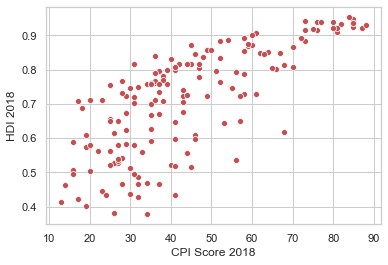

In [151]:
sb.set(style='whitegrid')
sb.scatterplot(x='CPI Score 2018', y='HDI 2018', data=df_final, color='r')

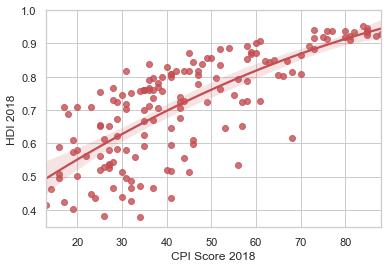

In [153]:
sb.set(style='whitegrid')
sb.regplot(x='CPI Score 2018', y='HDI 2018', data=df_final, color='r', order=2)

In [163]:
edu = pd.read_csv('../data/EDU.csv')

In [167]:
edu = edu[edu['Year'] > 2011]

In [169]:
edu = edu.rename(columns={'Entity': 'Country', 'Code': 'ISO3', 'Average total years of schooling for adult population (years)': 'Avg_school'})

In [171]:
edu = edu.set_index('ISO3')

In [172]:
edu

,Country,Year,Avg_school
ISO3,,,
AFG,Afghanistan,2012,3.4
AFG,Afghanistan,2013,3.5
AFG,Afghanistan,2014,3.5
AFG,Afghanistan,2015,3.6
AFG,Afghanistan,2016,3.6
...,...,...,...
ZWE,Zimbabwe,2013,8.0
ZWE,Zimbabwe,2014,8.2
ZWE,Zimbabwe,2015,8.2


In [380]:
table = edu.pivot_table('Avg_school', ['Country'], 'Year')

In [238]:
table

Year,2012,2013,2014,2015,2016,2017
Country,,,,,,
Afghanistan,3.4,3.5,3.5,3.6,3.6,3.8
Albania,9.6,9.7,9.7,9.7,10.0,10.0
Algeria,7.6,7.8,7.9,7.9,8.0,8.0
Andorra,10.2,10.2,10.2,10.2,10.2,10.2
Angola,4.8,4.9,4.9,5.0,5.1,5.1
...,...,...,...,...,...,...
Venezuela,9.7,9.9,10.0,10.1,10.1,10.3
Vietnam,7.8,7.9,7.8,8.0,8.1,8.2
Yemen,3.0,3.0,3.0,3.0,3.0,3.0


In [180]:
df_final

,Country,Region,CPI Score 2012,CPI Score 2013,CPI Score 2014,CPI Score 2015,CPI Score 2016,CPI Score 2017,CPI Score 2018,CPI Score 2019,HDI 2012,HDI 2013,HDI 2014,HDI 2015,HDI 2016,HDI 2017,HDI 2018
ISO3,,,,,,,,,,,,,,,,,
NZL,New Zealand,AP,90.0,91.0,91.0,91.0,90.0,89,87,87,0.905,0.907,0.910,0.914,0.917,0.920,0.921
DNK,Denmark,WE/EU,90.0,91.0,92.0,91.0,90.0,88,88,87,0.924,0.926,0.928,0.926,0.928,0.929,0.930
FIN,Finland,WE/EU,90.0,89.0,89.0,90.0,89.0,85,85,86,0.908,0.916,0.918,0.919,0.922,0.924,0.925
CHE,Switzerland,WE/EU,86.0,85.0,86.0,86.0,86.0,85,85,85,0.935,0.938,0.939,0.943,0.943,0.943,0.946
SGP,Singapore,AP,87.0,86.0,84.0,85.0,84.0,84,85,85,0.920,0.923,0.928,0.929,0.933,0.934,0.935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GNQ,Equatorial Guinea,SSA,20.0,19.0,NaN,NaN,NaN,17,16,16,0.587,0.588,0.590,0.593,0.592,0.590,0.588
SDN,Sudan,SSA,13.0,11.0,11.0,12.0,14.0,16,16,16,0.485,0.477,0.496,0.501,0.505,0.507,0.508
AFG,Afghanistan,AP,8.0,8.0,12.0,11.0,15.0,15,16,16,0.479,0.485,0.488,0.490,0.491,0.493,0.496


In [184]:
df_final = df_final.merge(table, on='ISO3')

In [192]:
df_final = df_final.rename(columns={2012: 'EDU 2012', 2013: 'EDU 2013', 2014: 'EDU 2014', 2015: 'EDU 2015', 2016: 'EDU 2016', 2017: 'EDU 2017'})

In [193]:
df_final

,Country,Region,CPI Score 2012,CPI Score 2013,CPI Score 2014,CPI Score 2015,CPI Score 2016,CPI Score 2017,CPI Score 2018,CPI Score 2019,...,HDI 2015,HDI 2016,HDI 2017,HDI 2018,EDU 2012,EDU 2013,EDU 2014,EDU 2015,EDU 2016,EDU 2017
ISO3,,,,,,,,,,,,,,,,,,,,,
NZL,New Zealand,AP,90.0,91.0,91.0,91.0,90.0,89,87,87,...,0.914,0.917,0.920,0.921,12.1,12.1,12.2,12.4,12.5,12.5
DNK,Denmark,WE/EU,90.0,91.0,92.0,91.0,90.0,88,88,87,...,0.926,0.928,0.929,0.930,12.8,13.2,12.8,12.5,12.6,12.6
FIN,Finland,WE/EU,90.0,89.0,89.0,90.0,89.0,85,85,86,...,0.919,0.922,0.924,0.925,12.4,12.3,12.4,12.4,12.4,12.4
CHE,Switzerland,WE/EU,86.0,85.0,86.0,86.0,86.0,85,85,85,...,0.943,0.943,0.943,0.946,13.4,13.4,13.4,13.4,13.4,13.4
SGP,Singapore,AP,87.0,86.0,84.0,85.0,84.0,84,85,85,...,0.929,0.933,0.934,0.935,11.3,11.4,11.4,11.5,11.5,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GNQ,Equatorial Guinea,SSA,20.0,19.0,NaN,NaN,NaN,17,16,16,...,0.593,0.592,0.590,0.588,5.5,5.5,5.5,5.5,5.5,5.5
SDN,Sudan,SSA,13.0,11.0,11.0,12.0,14.0,16,16,16,...,0.501,0.505,0.507,0.508,3.3,3.4,3.5,3.6,3.6,3.7
AFG,Afghanistan,AP,8.0,8.0,12.0,11.0,15.0,15,16,16,...,0.490,0.491,0.493,0.496,3.4,3.5,3.5,3.6,3.6,3.8


In [194]:
df_final.to_json('combined.json', orient='index')

In [196]:
df[cols].set_index('ISO3').to_json('cpi.json', orient='index')

In [200]:
df_final[['HDI 2012', 'HDI 2013', 'HDI 2014', 'HDI 2015', 'HDI 2016', 'HDI 2017', 'HDI 2018']].to_json('hdi.json', orient='index')

In [202]:
df_final[['EDU 2012', 'EDU 2013', 'EDU 2014', 'EDU 2015', 'EDU 2016', 'EDU 2017']].to_json('edu.json', orient='index')

In [211]:
edu[edu['Year'] > 2011].describe(include=['object'])

,Country
count,1134
unique,189
top,Malaysia
freq,6


In [243]:
table.to_json('teszt.json', orient='index')

In [229]:
del hdi['HDI Rank (2018)']

In [219]:
hdi = hdi[:190]

In [231]:
hdi = hdi[:189]

In [233]:
hdi = hdi[['Country', '2012', '2013', '2014', '2015', '2016', '2017', '2018']]

In [234]:
hdi

,Country,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,0.479,0.485,0.488,0.490,0.491,0.493,0.496
1,Albania,0.771,0.781,0.787,0.788,0.788,0.789,0.791
2,Algeria,0.737,0.746,0.749,0.751,0.755,0.758,0.759
3,Andorra,0.849,0.846,0.853,0.850,0.854,0.852,0.857
4,Angola,0.537,0.547,0.557,0.565,0.570,0.576,0.574
...,...,...,...,...,...,...,...,...
184,Venezuela (Bolivarian Republic of),0.767,0.772,0.770,0.763,0.752,0.735,0.726
185,Viet Nam,0.668,0.673,0.675,0.680,0.685,0.690,0.693
186,Yemen,0.501,0.506,0.504,0.493,0.477,0.463,0.463
187,Zambia,0.552,0.559,0.565,0.570,0.580,0.589,0.591


In [241]:
table = table.reset_index()

In [242]:
table

Year,Country,2012,2013,2014,2015,2016,2017
0,Afghanistan,3.4,3.5,3.5,3.6,3.6,3.8
1,Albania,9.6,9.7,9.7,9.7,10.0,10.0
2,Algeria,7.6,7.8,7.9,7.9,8.0,8.0
3,Andorra,10.2,10.2,10.2,10.2,10.2,10.2
4,Angola,4.8,4.9,4.9,5.0,5.1,5.1
...,...,...,...,...,...,...,...
184,Venezuela,9.7,9.9,10.0,10.1,10.1,10.3
185,Vietnam,7.8,7.9,7.8,8.0,8.1,8.2
186,Yemen,3.0,3.0,3.0,3.0,3.0,3.0
187,Zambia,6.7,6.8,6.9,6.9,7.0,7.0


In [1]:
import csv
from bs4 import BeautifulSoup
import requests

In [2]:
url = 'https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3'
headers = {'User-Agent': 'Mozilla/5.0'}

response = requests.get(url, headers=headers)

soup = BeautifulSoup(response.content, 'lxml')

In [3]:
relevant = soup.select('#mw-content-text > div > div.div-col.columns.column-width')

In [4]:
list_elements = relevant[0].find_all('li')

In [7]:
codes = {}

for l in list_elements:
    code = l.find('span')
    country = l.find('a')
    
    #codes[country.text] = code.text
    codes[code.text] = country.text

In [12]:
import json

In [13]:
with open('codes.json', 'w') as codes_file:
    json.dump(codes, codes_file)

In [298]:
hdi.insert(0, 'ISO3', None)

In [299]:
hdi

,ISO3,Country,2012,2013,2014,2015,2016,2017,2018,Code
0,None,Afghanistan,0.479,0.485,0.488,0.490,0.491,0.493,0.496,None
1,None,Albania,0.771,0.781,0.787,0.788,0.788,0.789,0.791,None
2,None,Algeria,0.737,0.746,0.749,0.751,0.755,0.758,0.759,None
3,None,Andorra,0.849,0.846,0.853,0.850,0.854,0.852,0.857,None
4,None,Angola,0.537,0.547,0.557,0.565,0.570,0.576,0.574,None
...,...,...,...,...,...,...,...,...,...,...
184,None,Venezuela (Bolivarian Republic of),0.767,0.772,0.770,0.763,0.752,0.735,0.726,None
185,None,Viet Nam,0.668,0.673,0.675,0.680,0.685,0.690,0.693,None
186,None,Yemen,0.501,0.506,0.504,0.493,0.477,0.463,0.463,None
187,None,Zambia,0.552,0.559,0.565,0.570,0.580,0.589,0.591,None


In [305]:
hdi = hdi.set_index('Country')

In [312]:
indices = hdi.index.values

for c in codes:
    if c in indices:
        hdi.loc[c, 'ISO3'] = codes[c]

In [314]:
hdi = hdi.reset_index()

In [316]:
hdi = hdi.set_index('ISO3')

In [324]:
hdi = hdi.rename(columns={'2012': 'HDI Score 2012', '2013': 'HDI Score 2013', '2014': 'HDI Score 2014', '2015': 'HDI Score 2015', '2016': 'HDI Score 2016', '2017': 'HDI Score 2017', '2018': 'HDI Score 2018'})

In [335]:
hdi.describe(include=['object'])

,ISO3,Country,HDI Score 2012,HDI Score 2013,HDI Score 2014,HDI Score 2015,HDI Score 2016,HDI Score 2017
count,181,189,189,189,189,189,189,189
unique,181,189,168,154,157,160,164,158
top,WSM,Malaysia,0.908,0.439,0.853,0.927,0.722,0.813
freq,1,1,3,3,3,3,3,5


In [334]:
hdi = hdi.reset_index()

In [353]:
hdi[hdi['ISO3'].isnull()]

,ISO3,Country,HDI Score 2012,HDI Score 2013,HDI Score 2014,HDI Score 2015,HDI Score 2016,HDI Score 2017,HDI Score 2018


In [343]:
hdi.loc[39, 'ISO3'] = 'COD'

In [345]:
hdi.loc[56, 'ISO3'] = 'SWZ'

In [346]:
hdi.loc[74, 'ISO3'] = 'HKG'

In [347]:
hdi.loc[90, 'ISO3'] = 'KOR'

In [349]:
hdi.loc[113, 'ISO3'] = 'MDA'

In [350]:
hdi.loc[167, 'ISO3'] = 'TZA'

In [351]:
hdi.loc[179, 'ISO3'] = 'GBR'

In [352]:
hdi.loc[180, 'ISO3'] = 'USA'

In [354]:
hdi = hdi.set_index('ISO3')

In [370]:
hdi[['HDI Score 2012', 'HDI Score 2013', 'HDI Score 2014', 'HDI Score 2015', 'HDI Score 2016', 'HDI Score 2017', 'HDI Score 2018']] = hdi[['HDI Score 2012', 'HDI Score 2013', 'HDI Score 2014', 'HDI Score 2015', 'HDI Score 2016', 'HDI Score 2017', 'HDI Score 2018']].astype('float64')

In [366]:
hdi = hdi.replace('..', np.nan)

In [371]:
hdi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189 entries, AFG to ZWE
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         189 non-null    object 
 1   HDI Score 2012  188 non-null    float64
 2   HDI Score 2013  188 non-null    float64
 3   HDI Score 2014  188 non-null    float64
 4   HDI Score 2015  188 non-null    float64
 5   HDI Score 2016  188 non-null    float64
 6   HDI Score 2017  189 non-null    float64
 7   HDI Score 2018  189 non-null    float64
dtypes: float64(7), object(1)
memory usage: 18.3+ KB


In [372]:
hdi

,Country,HDI Score 2012,HDI Score 2013,HDI Score 2014,HDI Score 2015,HDI Score 2016,HDI Score 2017,HDI Score 2018
ISO3,,,,,,,,
AFG,Afghanistan,0.479,0.485,0.488,0.490,0.491,0.493,0.496
ALB,Albania,0.771,0.781,0.787,0.788,0.788,0.789,0.791
DZA,Algeria,0.737,0.746,0.749,0.751,0.755,0.758,0.759
AND,Andorra,0.849,0.846,0.853,0.850,0.854,0.852,0.857
AGO,Angola,0.537,0.547,0.557,0.565,0.570,0.576,0.574
...,...,...,...,...,...,...,...,...
VEN,Venezuela (Bolivarian Republic of),0.767,0.772,0.770,0.763,0.752,0.735,0.726
VNM,Viet Nam,0.668,0.673,0.675,0.680,0.685,0.690,0.693
YEM,Yemen,0.501,0.506,0.504,0.493,0.477,0.463,0.463


In [373]:
hdi.to_json('hdi.json', orient='index')

In [383]:
table.insert(0, 'ISO3', None)

In [385]:
table = table.reset_index()

In [387]:
table = table.set_index('Country')

In [388]:
table

Year,ISO3,2012,2013,2014,2015,2016,2017
Country,,,,,,,
Afghanistan,None,3.4,3.5,3.5,3.6,3.6,3.8
Albania,None,9.6,9.7,9.7,9.7,10.0,10.0
Algeria,None,7.6,7.8,7.9,7.9,8.0,8.0
Andorra,None,10.2,10.2,10.2,10.2,10.2,10.2
Angola,None,4.8,4.9,4.9,5.0,5.1,5.1
...,...,...,...,...,...,...,...
Venezuela,None,9.7,9.9,10.0,10.1,10.1,10.3
Vietnam,None,7.8,7.9,7.8,8.0,8.1,8.2
Yemen,None,3.0,3.0,3.0,3.0,3.0,3.0


In [389]:
indices = table.index.values

In [393]:
for c in codes:
    if c in indices:
        table.loc[c, 'ISO3'] = codes[c]

In [398]:
table = table.reset_index()

In [422]:
table[table['ISO3'].isnull()]

Year,Country,ISO3,2012,2013,2014,2015,2016,2017
179,United Kingdom,None,12.9,12.6,12.7,12.8,12.9,12.9
180,United States,None,13.3,13.2,13.3,13.3,13.4,13.4
184,Venezuela,None,9.7,9.9,10.0,10.1,10.1,10.3
185,Vietnam,None,7.8,7.9,7.8,8.0,8.1,8.2


In [400]:
table.loc[20, 'ISO3'] = 'BOL'

In [402]:
table.loc[24, 'ISO3'] = 'BRN'

In [403]:
table.loc[31, 'ISO3'] = 'CPV'

In [404]:
table.loc[40, 'ISO3'] = 'CIV'

In [405]:
table.loc[44, 'ISO3'] = 'CZE'

In [407]:
table.loc[45, 'ISO3'] = 'COD'

In [408]:
table.loc[78, 'ISO3'] = 'IRN'

In [409]:
table.loc[91, 'ISO3'] = 'LAO'

In [410]:
table.loc[100, 'ISO3'] = 'MKD'

In [411]:
table.loc[111, 'ISO3'] = 'FSM'

In [413]:
table.loc[112, 'ISO3'] = 'MDA'

In [414]:
table.loc[129, 'ISO3'] = 'PSE'

In [415]:
table.loc[139, 'ISO3'] = 'RUS'

In [416]:
table.loc[156, 'ISO3'] = 'KOR'

In [417]:
table.loc[162, 'ISO3'] = 'SWZ'

In [419]:
table.loc[165, 'ISO3'] = 'SYR'

In [420]:
table.loc[167, 'ISO3'] = 'TZA'

In [421]:
table.loc[169, 'ISO3'] = 'TLS'

In [423]:
table.loc[179, 'ISO3'] = 'GBR'

In [424]:
table.loc[180, 'ISO3'] = 'USA'

In [425]:
table.loc[184, 'ISO3'] = 'VEN'

In [426]:
table.loc[185, 'ISO3'] = 'VNM'

In [429]:
table = table.rename(columns={2012: 'EDU Score 2012', 2013: 'EDU Score 2013', 2014: 'EDU Score 2014', 2015: 'EDU Score 2015', 2016: 'EDU Score 2016', 2017: 'EDU Score 2017'})

In [431]:
table = table.set_index('ISO3')

In [432]:
table.to_json('edu.json', orient='index')

In [436]:
df = pd.read_json('cpi.json', orient='index')

In [438]:
df = df.reset_index()

In [443]:
df = df.rename({'index': 'ISO3'})

In [444]:
hdi = hdi.reset_index()

In [448]:
hdi = hdi.rename(columns={'ISO3': 'index'})

In [451]:
table = table.reset_index()

In [455]:
table

Year,index,Country,EDU Score 2012,EDU Score 2013,EDU Score 2014,EDU Score 2015,EDU Score 2016,EDU Score 2017
0,AFG,Afghanistan,3.4,3.5,3.5,3.6,3.6,3.8
1,ALB,Albania,9.6,9.7,9.7,9.7,10.0,10.0
2,DZA,Algeria,7.6,7.8,7.9,7.9,8.0,8.0
3,AND,Andorra,10.2,10.2,10.2,10.2,10.2,10.2
4,AGO,Angola,4.8,4.9,4.9,5.0,5.1,5.1
...,...,...,...,...,...,...,...,...
184,VEN,Venezuela,9.7,9.9,10.0,10.1,10.1,10.3
185,VNM,Vietnam,7.8,7.9,7.8,8.0,8.1,8.2
186,YEM,Yemen,3.0,3.0,3.0,3.0,3.0,3.0
187,ZMB,Zambia,6.7,6.8,6.9,6.9,7.0,7.0


In [454]:
table = table.rename(columns={'ISO3': 'index'})

In [461]:
combined = df.merge(hdi[['index', 'HDI Score 2012', 'HDI Score 2013', 'HDI Score 2014', 'HDI Score 2015', 'HDI Score 2016', 'HDI Score 2017', 'HDI Score 2018']], on='index')

In [465]:
combined = combined.merge(table[['index', 'EDU Score 2012', 'EDU Score 2013', 'EDU Score 2014', 'EDU Score 2015', 'EDU Score 2016', 'EDU Score 2017']], on='index')

In [471]:
combined.to_json('combined.json', orient='index')

In [470]:
combined = combined.set_index('index')

In [472]:
combined.describe()

,CPI Score 2012,CPI Score 2013,CPI Score 2014,CPI Score 2015,CPI Score 2016,CPI Score 2017,CPI Score 2018,CPI Score 2019,HDI Score 2012,HDI Score 2013,...,HDI Score 2015,HDI Score 2016,HDI Score 2017,HDI Score 2018,EDU Score 2012,EDU Score 2013,EDU Score 2014,EDU Score 2015,EDU Score 2016,EDU Score 2017
count,171.000000,172.000000,170.000000,164.000000,172.000000,176.000000,176.000000,176.000000,176.000000,176.000000,...,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,43.514620,42.895349,43.523529,42.957317,43.255814,43.323864,43.392045,43.426136,0.689784,0.694676,...,0.703102,0.706244,0.709153,0.711432,8.074432,8.173864,8.267614,8.335227,8.410795,8.438636
std,19.471051,19.741327,19.639714,20.004708,19.297417,18.929122,19.003451,18.815957,0.157059,0.156725,...,0.155595,0.155386,0.154916,0.154458,3.177919,3.169660,3.170764,3.173913,3.170479,3.157338
min,8.000000,8.000000,11.000000,11.000000,11.000000,12.000000,13.000000,12.000000,0.338000,0.345000,...,0.360000,0.365000,0.373000,0.377000,1.400000,1.400000,1.400000,1.400000,1.500000,1.500000
25%,29.000000,28.000000,29.000000,28.000000,29.000000,29.750000,29.000000,29.000000,0.548000,0.557250,...,0.567500,0.572000,0.577750,0.583250,5.475000,5.500000,5.600000,5.775000,5.950000,6.100000
50%,37.000000,38.000000,38.000000,37.000000,38.000000,38.500000,38.000000,40.000000,0.724000,0.725500,...,0.730500,0.729500,0.730500,0.729000,8.350000,8.400000,8.550000,8.650000,8.700000,8.700000
75%,55.500000,55.250000,55.000000,54.250000,57.000000,56.250000,57.000000,56.000000,0.812750,0.815000,...,0.828500,0.832500,0.833500,0.834750,10.900000,11.000000,11.100000,11.200000,11.300000,11.300000
max,90.000000,91.000000,92.000000,91.000000,90.000000,89.000000,88.000000,87.000000,0.942000,0.946000,...,0.948000,0.951000,0.953000,0.954000,14.000000,14.000000,14.000000,14.100000,14.100000,14.100000


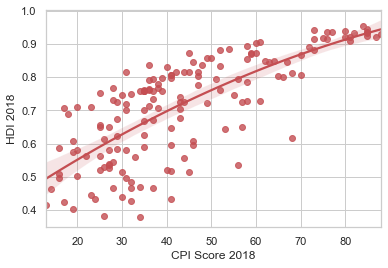

In [473]:
sb.set(style='whitegrid')
sb.regplot(x='CPI Score 2018', y='HDI 2018', data=df_final, color='r', order=2)

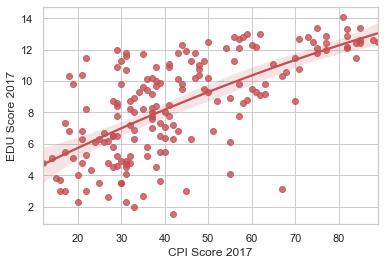

In [474]:
sb.set(style='whitegrid')
sb.regplot(x='CPI Score 2017', y='EDU Score 2017', data=combined, color='r', order=2)

In [475]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176 entries, NZL to SSD
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         176 non-null    object 
 1   Region          176 non-null    object 
 2   CPI Score 2012  171 non-null    float64
 3   CPI Score 2013  172 non-null    float64
 4   CPI Score 2014  170 non-null    float64
 5   CPI Score 2015  164 non-null    float64
 6   CPI Score 2016  172 non-null    float64
 7   CPI Score 2017  176 non-null    int64  
 8   CPI Score 2018  176 non-null    int64  
 9   CPI Score 2019  176 non-null    int64  
 10  HDI Score 2012  176 non-null    float64
 11  HDI Score 2013  176 non-null    float64
 12  HDI Score 2014  176 non-null    float64
 13  HDI Score 2015  176 non-null    float64
 14  HDI Score 2016  176 non-null    float64
 15  HDI Score 2017  176 non-null    float64
 16  HDI Score 2018  176 non-null    float64
 17  EDU Score 2012  176 non-null    float6